# Outputs

The output of the **cpd** function is of the form

                        factors, T_approx, output

We will see what each one of these outputs represents. Let's start importing the necessary modules and creating the same tensors of the previous lessons.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import TensorFox as tfx

In [2]:
# Create and print the tensor.
m = 2
T = np.zeros((m, m, m))
s = 0

for k in range(m):
    for i in range(m):
        for j in range(m):
            T[i,j,k] = s
            s += 1

# The list *factors* and the array *T_approx*

Given the tensor $T \in \mathbb{R}^{I_1 \times I_2 \times \ldots \times I_L}$ and a rank $R$, the most important output of the CPD function is the list $\verb|factors|$. This is a list of $L$ matrices $W^{(1)}, \ldots, W^{(L)}$ such that $W^{(\ell)} \in \mathbb{R}^{I_\ell \times R}$. These are the factor matrices of the approximated CPD, and they are such that 

$$T_{approx} = (W^{(1)}, \ldots, W^{(L)}) \cdot I,$$
where $I$ is the unit diagonal tensor with of shape $\underbrace{R \times R \times \ldots \times R}_{L \text{ times}}$. Ideally, we want to have $T_{approx} \approx T$. 

# The list *output*

As the name suggests, $\verb|output|$ contains information about all the computations made to achieve the approximate CPD of $T$. If $T$ is a third order tensor, then $\verb|output|$ is a class, not a list. It comes with the following variables:

- **num_steps**: Total number of steps (iterations of dGN) made in the two stages, main and refinement.

- **rel_error**: $\displaystyle = \frac{\|T - T_{approx}\|}{\|T\|}$

- **accuracy**: It is the value $100\cdot (1 - \verb|rel| \_ \verb|error|)$. If the relative error is too big (bigger than $1$), the program just set the accuracy to $0$ so there is no negative accuracy. 

- **step_sizes**: It is a list with two arrays. The arrays contains sizes of the steps given at each iteration of the function *dGN* in the first (main) and seconds (refinement) stages.

- **errors**: It is a list with two arrays. The arrays contains relative errors at each iteration of the function *dGN* in the first (main) and seconds (refinement) stages.

- **improv**: It is a list with two arrays. The arrays contains the differences between consecutive relative errors at each iteration of the function *dGN* in the first (main) and second (refinement) stages.

- **gradients**: It is a list of two arrays. The arrays contains the infinity norm of the gradient at each iteration of the function *dGN* in the first (main) and seconds (refinement) stages. We expect that both arrays converges to zero since the minimum is a critical point.

- **stop**: It is a list with two integers. The first one is a number indicating what stopping condition made the *dGN* function stop iterating at the main stage, and the second one is a number indicating what stopping condition made the *dGN* function stop iterating at the refinement stage.

- **stop_msg**: This method prints messages describing the reason for each stop at each one of the two stages mentioned in the list **stop** above.

- **options**: All the options the user gave as input are also passed as output, together with the other default options. The parameters $\verb|bi| \_ \verb|method|, \ \verb|bi| \_ \verb|method| \_ \verb|maxiter|$ and $\verb|bi| \_ \verb|method| \_ \verb|tol|$ are joined in a list called $\verb|bi| \_ \verb|method| \_ \verb|parameters|$, and the parameters $\verb|low|, \ \verb|upp|$ and $\verb|factor|$ are joined in a list called $\verb|constraints|$.

If $T$ has order higher than $3$, then $\verb|output|$ is a list of classes, where each class correspond to the output class of a third order tensor computed to form the train tensor format. If the parameter $\verb|trials|$ is bigger than $1$, only the best third order CPD (of each piece of the tensor train) reported have its class passed as output. At the end of the day, $\verb|outputs|$ is a list of $L-2$ classes so that $\verb|output|$[0] refers to the class of the first CPD computed, $\verb|output|$[1] refers to the second one, and so on.

In [3]:
# Compute the CPD of T.
class options:
    display = 1
    refine = True

r = 3
factors, output = tfx.cpd(T, r, options)

-----------------------------------------------------------------------------------------------
Computing MLSVD
    No compression detected
    Working with dimensions (2, 2, 2)
-----------------------------------------------------------------------------------------------
Type of initialization: random
-----------------------------------------------------------------------------------------------
Computing CPD

Computing refinement of solution
-----------------------------------------------------------------------------------------------
Computing CPD
Final results
    Number of steps = 27
    Relative error = 1.144667303876956e-06
    Accuracy =  99.99989 %


In [4]:
# Show information contained in the class 'output'
print('Number of steps in main stage:', output.step_sizes[0].size)
print()
print('Number of steps in refinement stage:', output.step_sizes[1].size)
print()
print('Total number of steps:', output.num_steps)
print()
print('Relative error:', output.rel_error)
print()
print('Accuracy:', np.round(output.accuracy,5), '%')
print()
print('Stop numbers:', output.stop)
print()
print()
print('Description of each stop:') 
print('-------------------------')
print(output.stop_msg())
print()
print('Options used:')
print('-------------')
print('Maximum number of iterations:', output.options.maxiter)
print()
print('Tolerance:', output.options.tol)
print()
print('Step size tolerance:', output.options.tol_step)
print()
print('Improvement tolerance:', output.options.tol_improv)
print()
print('Gradient tolerance:', output.options.tol_grad)
print()
print('Inner algorithm parameters: [method, cg_maxiter, cg_factor, cg_tol] =', 
     [output.options.method,
     output.options.cg_maxiter,
     output.options.cg_factor,
     output.options.cg_tol])
print()
print('Type of initialization:', output.options.initialization)
print()
print('MLSVD tolerance:', output.options.tol_mlsvd)
print()
print('Truncation dims given (0 if not given):', output.options.trunc_dims)
print()
print('Initial damping parameter factor:', output.options.init_damp)
print()
print('Refinement:', output.options.refine)
print()
print('Symmetry:', output.options.symm)
print()
print('Constraints: [low, upp, factor] =', output.options.constraints)
print()
print('Display:', output.options.display)
print()
print('Trials:', output.options.trials)
print()
print('Bi inner algorithm description:', output.options.bi_method_parameters)
print()
print('Epochs:', output.options.epochs)

Number of steps in main stage: 24

Number of steps in refinement stage: 3

Total number of steps: 27

Relative error: 1.144667303876956e-06

Accuracy: 99.99989 %

Stop numbers: [2, 1]


Description of each stop:
-------------------------

Main stop:
2 - Improvement in the relative error is small enough.

Refinement stop:
1 - Steps are small enough.


Options used:
-------------
Maximum number of iterations: 200

Tolerance: 1e-06

Step size tolerance: 1e-06

Improvement tolerance: 1e-06

Gradient tolerance: 1e-06

Inner algorithm parameters: [method, cg_maxiter, cg_factor, cg_tol] = ['dGN', 300, 1, 1e-12]

Type of initialization: random

MLSVD tolerance: 1e-16

Truncation dims given (0 if not given): 0

Initial damping parameter factor: 1

Refinement: True

Symmetry: False

Constraints: [low, upp, factor] = [0, 0, 0]

Display: 1

Trials: 3

Bi inner algorithm description: ['als', 500, 1e-06]

Epochs: 1


In [5]:
# There is a shortcut to visualize all the options used in the computations.
tfx.disp.show_options(output)

bi_method_parameters : ['als', 500, 1e-06]
cg_factor : 1
cg_maxiter : 300
cg_tol : 1e-12
constraints : [0, 0, 0]
display : 1
epochs : 1
factors_norm : 0
init_damp : 1
initialization : random
inner_method : cg
maxiter : 200
method : dGN
refine : True
symm : False
tol : 1e-06
tol_grad : 1e-06
tol_improv : 1e-06
tol_mlsvd : 1e-16
tol_step : 1e-06
trials : 3
trunc_dims : 0


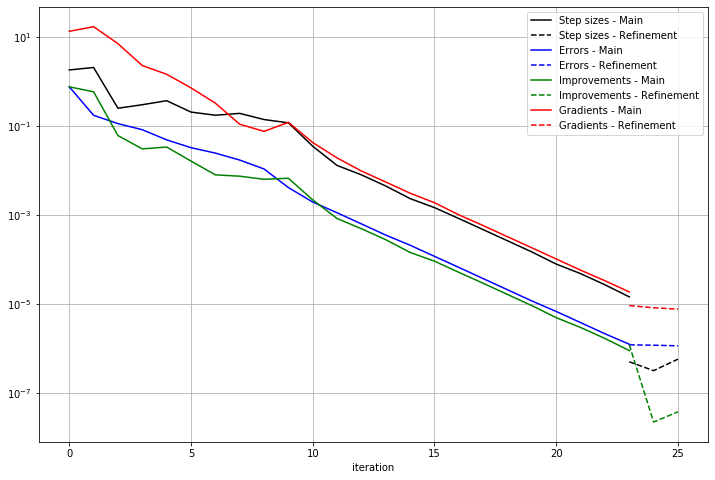

In [6]:
# The arrays step_sizes, errors, improv and gradients are plotted together below.
# We put both stages, main and refinement, in the same plot.
plt.figure(figsize=[12,8])

# We divide the arrays of errors by the norm of T to obtain values associated to the relative errors.
Tsize = np.linalg.norm(T)

# a is the size of the arrays of the main stage and b is the size of the arrays of the refinement stage.
a = output.step_sizes[0].size
b = output.step_sizes[1].size

# Step sizes
plt.plot(np.arange(a), output.step_sizes[0],'k-' , markersize=2, label='Step sizes - Main')
plt.plot(np.arange(a-1, a+b-1), output.step_sizes[1],'k--' , markersize=2, label='Step sizes - Refinement')

# Errors
plt.plot(np.arange(a), output.errors[0],'b-' , markersize=2, label='Errors - Main')
plt.plot(np.arange(a-1, a+b-1), output.errors[1],'b--' , markersize=2, label='Errors - Refinement')

# Error improvements
plt.plot(np.arange(a), output.improv[0], 'g-', markersize=2, label='Improvements - Main')
plt.plot(np.arange(a-1, a+b-1), output.improv[1], 'g--', markersize=2, label='Improvements - Refinement')

# Gradients
plt.plot(np.arange(a), output.gradients[0], 'r-', markersize=2, label='Gradients - Main')
plt.plot(np.arange(a-1, a+b-1), output.gradients[1], 'r--', markersize=2, label='Gradients - Refinement')

plt.xlabel('iteration')
plt.yscale('log')
plt.grid()
plt.legend()
plt.show()